In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from colormaps_dataset import generate_cmap_tensors, color_cmaps_dir

2023-12-17 14:40:49.307789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Generate the cmap tensors in the `data/color_images/cmaps` directory of this project
# Uncomment this line if you don't have data
# generate_cmap_tensors()
color_cmaps_dir = f"{color_cmaps_dir}_exclude"
print(len(glob.glob(os.path.join(color_cmaps_dir, '*/*.png'))))

146


In [3]:
# run all 170 in 1 batch because they are tiny files
batch_size = 170

# Single row of color
img_height = 1

# 256 colors per row (1 row)
img_width = 256

# Set a seed
random_seed = 978123654

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  color_cmaps_dir,
  validation_split=0.2,
  subset="training",
  seed=random_seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 6 classes.
Using 118 files for training.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Sequential', 'Uncategorized']


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  color_cmaps_dir,
  validation_split=0.2,
  subset="validation",
  seed=random_seed,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 147 files belonging to 6 classes.
Using 29 files for validation.


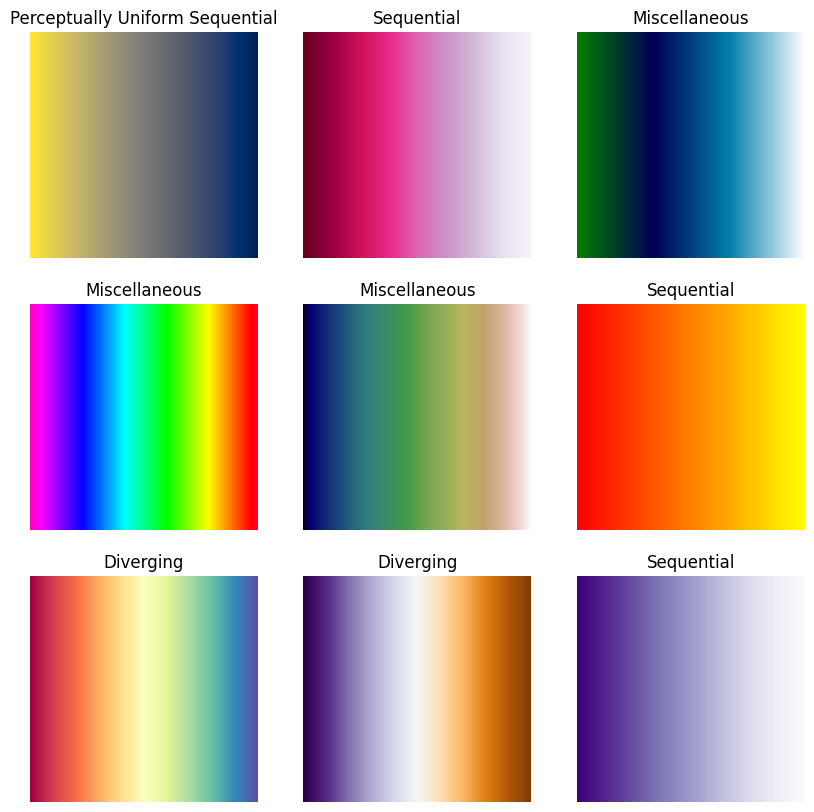

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"), aspect='auto')
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(118, 1, 256, 3)
(118,)


In [9]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Flatten(),    
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [11]:
epochs=25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/25
1/1 [==============================] - 1s 755ms/step - loss: 11.8639 - accuracy: 0.3559 - val_loss: 100.9304 - val_accuracy: 0.4138
Epoch 2/25
1/1 [==============================] - 0s 43ms/step - loss: 106.0178 - accuracy: 0.4915 - val_loss: 211.9341 - val_accuracy: 0.2414
Epoch 3/25
1/1 [==============================] - 0s 42ms/step - loss: 223.8551 - accuracy: 0.2288 - val_loss: 113.4328 - val_accuracy: 0.2069
Epoch 4/25
1/1 [==============================] - 0s 48ms/step - loss: 103.9076 - accuracy: 0.2203 - val_loss: 94.7956 - val_accuracy: 0.0690
Epoch 5/25
1/1 [==============================] - 0s 47ms/step - loss: 62.8281 - accuracy: 0.0763 - val_loss: 98.4347 - val_accuracy: 0.4828
Epoch 6/25
1/1 [==============================] - 0s 52ms/step - loss: 55.1183 - accuracy: 0.6356 - val_loss: 117.7880 - val_accuracy: 0.4828
Epoch 7/25
1/1 [==============================] - 0s 46ms/step - loss: 68.6457 - accuracy: 0.6356 - val_loss: 124.3314 - val_accuracy: 0.4828
Epoc

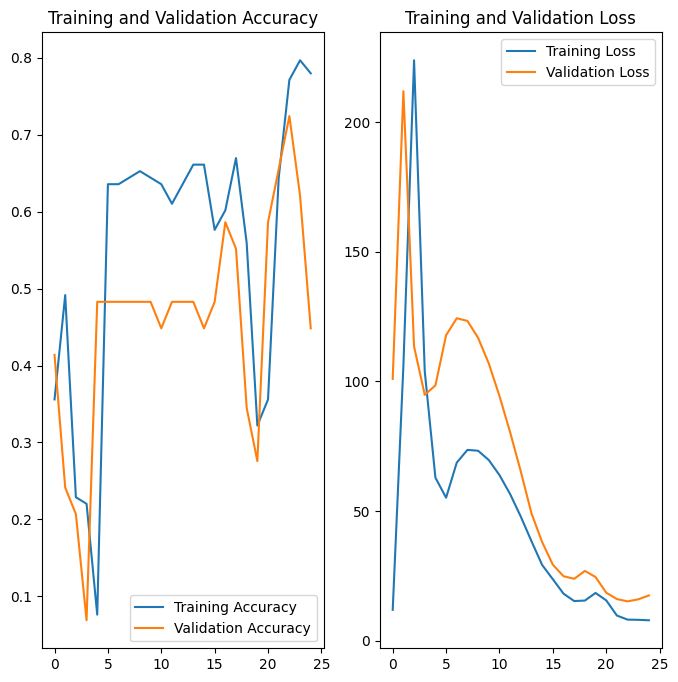

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [13]:
# https://www.tensorflow.org/tutorials/generative/dcgan